In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import glob
import re
import matplotlib.pyplot as plt

Running the different scripts we have in the folder, we obtained this folder data/info/bachelor with all the .xls files from 2007 and on, over which we will want to run this analysis script.
The first thing we do is to load the data, after some preliminary checks: is the file structure coherent from one file to another? We check this with a print of the column names each file has. The result is encouraging since the files share the same structure. 

Having the data, we knew we only needed to keep a few columns: the gender, the identity (sciper to ease things up and avoid people with the same name being an issue) and the presence.

The first two seem to be logical indices, and the gender is more macroscopic than the ID. Thus in the dataframe extracted from a single .xls, we ditch everything else than the 3 previously mentionned, and hierarchically reindex the rows : gender -> index.

We are left with a single column: the Status. When we tried to merge the DFs together, we realized it would be convenient to have a column per semester and year. This seems logical to visualize and individual's progression within EPFL. The semester and year can be extracted from the file's name, and as a value we can keep the presence. The latter can be either: Present, Away (or NaN). By monitoring the succession of presences, we can determine the time it took to a given student to get his bachelors.


An issue that occured to us afterwards is: what if someone is registered in BA1 in 2007 but has done it's first BA1 in 2006 ? 




In [2]:
#In this block we get the data and wrangle it

folder_path = "data/info/bachelor"
students = pd.DataFrame([])
for file_path in glob.iglob(folder_path+'/*.XLS'):
        tmp_data = pd.read_html(file_path, index_col=[0, 10], header=2)[0] #excel format is corrupted, but reading them as html works
        #We extract the Year and semester from the file's name
        num_sem = float(re.sub("[^0-9]", "", str(file_path).strip())[-2])
        if num_sem % 2 == 0:
            Year = re.sub("[^0-9]", "", str(file_path).strip())[4:8]
            Semester = "Summer"

        else:
            Year = re.sub("[^0-9]", "", str(file_path).strip())[:4]
            Semester = "Winter"
        #We sort by index, the most macroscopic index being the gender
        tmp_data= tmp_data[["Statut"]].sort_index()
        #We rename the columns so as to have the season and year instead of something called "Status"
        tmp_data.columns=[[Year], [Semester]]
        students = pd.concat([students, tmp_data], axis=1, join='outer')   
             
students = students.sort_index(axis=1)
students.to_csv("Students.csv")
students.columns.is_unique
students[students=="Présent"] = 1
students[students=="Congé"] = 1 #you cannot take a year off during your bachelors, congés will be put for Erasmus 90% of the time
students = students.fillna(0)

In [3]:
Madame = pd.DataFrame(students.loc["Madame"].sum(axis=1))
Madame = Madame[Madame[0] > 5]
Madame.describe()

,0
count,32.000000
mean,6.781250
std,1.288519
min,6.000000
25%,6.000000
50%,6.000000
75%,7.250000
max,11.000000


In [4]:
Monsieur = pd.DataFrame(students.loc["Monsieur"].sum(axis=1)) 
Monsieur = Monsieur[Monsieur[0] > 5]
Monsieur.describe()

,0
count,263.000000
mean,6.969582
std,1.356011
min,6.000000
25%,6.000000
50%,6.000000
75%,8.000000
max,12.000000


(-1.0010467950952722,
 1.0000000159916886,
 -1.0058195355897017,
 1.005357531594262)

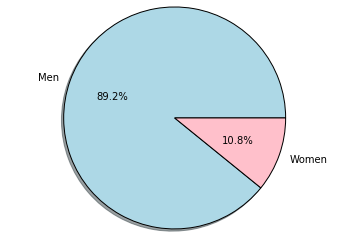

In [38]:
labels = "Men", "Women"
sizes = [Monsieur.size, Madame.size]
colors = ["lightblue", "pink"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')

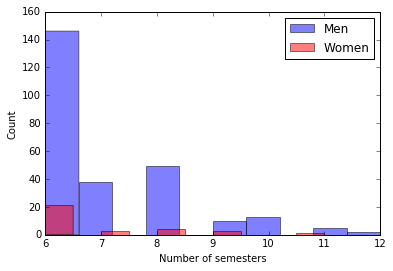

In [28]:
plt.hist(Monsieur, alpha = 0.5, label = "Men")
plt.hist(Madame, facecolor='red', alpha = 0.5, label = "Women")
plt.xlabel("Number of semesters")
plt.ylabel("Count")
plt.legend()


MASTER STUDENTS

In [46]:
#In this block we get the data and wrangle it

folder_path = "data/info/master"
students = pd.DataFrame([])
for file_path in glob.iglob(folder_path+'/*.XLS'):
        tmp_data = pd.read_html(file_path, index_col=[0, 10], header=2)[0] #excel format is corrupted, but reading them as html works
        #We extract the Year and semester from the file's name
        num_sem = float(re.sub("[^0-9]", "", str(file_path).strip())[-2])
        if num_sem % 2 == 0:
            Year = re.sub("[^0-9]", "", str(file_path).strip())[4:8]
            Semester = "Summer"

        else:
            Year = re.sub("[^0-9]", "", str(file_path).strip())[:4]
            Semester = "Winter"
        #We sort by index, the most macroscopic index being the gender
        tmp_data= tmp_data[["Statut"]].sort_index()
        #We rename the columns so as to have the season and year instead of something called "Status"
        tmp_data.columns=[[Year], [Semester]]
        students = pd.concat([students, tmp_data], axis=1, join='outer')   
             
students = students.sort_index(axis=1)
students.to_csv("Students.csv")
students.columns.is_unique
students[students=="Présent"] = 1
students[students=="Stage"] = 1

students[students=="Congé"] = 1 #you cannot take a year off during your bachelors, congés will be put for Erasmus 90% of the time
students = students.fillna(0)

In [50]:
Madame = pd.DataFrame(students.loc["Madame"].sum(axis=1))
Madame = Madame[Madame[0] > 3]
Madame.describe()

,0
count,36.000000
mean,4.583333
std,0.731925
min,4.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,7.000000


In [49]:
Monsieur = pd.DataFrame(students.loc["Monsieur"].sum(axis=1)) 
Monsieur = Monsieur[Monsieur[0] > 3]
Monsieur.describe()

,0
count,241.000000
mean,4.526971
std,0.719012
min,4.000000
25%,4.000000
50%,4.000000
75%,5.000000
max,8.000000


(-1.0053821988790754,
 1.0000000255729682,
 -1.0055744056328064,
 1.0062094784133699)

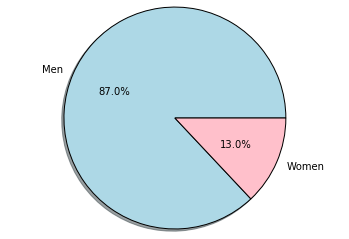

In [51]:
labels = "Men", "Women"
sizes = [Monsieur.size, Madame.size]
colors = ["lightblue", "pink"]

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')

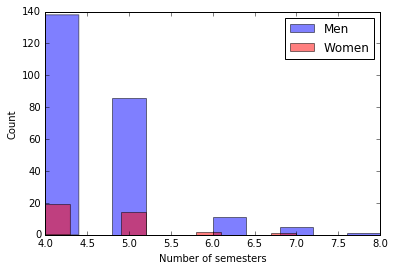

In [52]:
plt.hist(Monsieur, alpha = 0.5, label = "Men")
plt.hist(Madame, facecolor='red', alpha = 0.5, label = "Women")
plt.xlabel("Number of semesters")
plt.ylabel("Count")
plt.legend()